### Decision Tree in Machine Learning:
- It is a supervised Learning algorithm used for both regression and classification tasks.
- It has a hierarchical tree structure which consists of root nodes, branches, internal nodes, and leaf nodes.
- It works like a flowchart help to make decisions step by step where -\
  - Internal nodes represent attribute tests.
  - Branches represent attribute values.
  - Leaf nodes represent final decisions (or) predictors.
- Decision trees are widely used due to their interpretability, flexibilty and low preprocessing needs.

### Types of Decision Trees
#### 1. ID3(Iterative Dichotomiser 3):
- It is a classic decision tree algorithm commonly used for classification tasks.
- It calculates entropy and information gain for each feature and selects the feature with the highest information gain for splitting.
  - a. Entropy - It measures impurity in the dataset.Denoted by H(D) for dataset D
    - Formula - H(D) = Σp(i)log2(p(i))
  - b. Information gain - It quantifies the reduction in entropy after splitting the dataset on a feature.
    - Formula - IG = H(D) - Σ(|D(v)|/|D|)H(D(v))
   
#### 2. C4.5:
- It uses a modified version of information gain called gain ratio to reduce the bias towards features with many values.
- The gain ratio is computed by dividing the information gain by the intrinsic information which measures the amount of data required to describe an attribute's values.
- Formula - GR = Split gain / Gain information.
#### 3. CART:
- It is used for both classification and regression tasks.
  - 1. For classification, CART splits data based on the Gini impurity which measures the liklihood of incorrectly classified randomly selected data.
    - Formula - Gini(D) = 1-Σp^2(i)
      - Where, p(i) - probability of class i in dataset D.
  - 2. For regression, CART builds regression trees by minimizing the variance of the target variable within each dataset.
#### 4. CHAID (Chi-Square Automatic Interaction Detection)
- It uses chi-square tests to determine best splits especially for categorical variables.
- Formula - X^2 = Σ[(O(i)-E(i))^2/E(i)]
  - Where, O(i) - observed frequency
  - E(i) - expected frequency in each category.
#### 5. MARS:
- It is extended version of CART using piecewise linear functions to model non-linear relationship but it is computationally expensive.
#### 6. Conditional Interence Trees:
- Uses statistical hypothesis testing for unbiased splits and handles various data types but it is slower than others.

### Implementing Decision Tree Regression
#### Step 1: Importing the required libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error

#### Step 2: Creating a Sample Dataset
- np.seed(specified_value) - It can be used to genrate specific value for from starting point for generating a sequence of pseudo-random numbers, ensuring that the same sequence is produced every time the code is run with the same seed value.
- feature values x are randomly sampled and sorted between 0 and 5 .
- target y is noisey sine function of x.

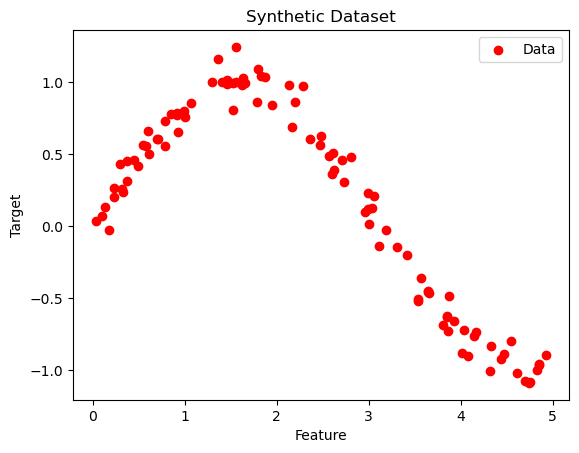

In [3]:
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

plt.scatter(X, y, color='red', label='Data')
plt.title('Synthetic Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

#### Step 3: Splitting the Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Step 4: Initializing the Decision Tree Regressor
- max_depth=4 - Which controls the maximum levels a tree can reach, controlling model complexity.
- random_state=42 - If not set this, every time you run your code again, it will generate a different test set.

In [6]:
regressor = DecisionTreeRegressor(max_depth=4, random_state=42)

#### Step 5: Fiting Decision Tree Regressor Model

In [7]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

#### Step 6: Predicting a New Value

In [8]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error:{mse:.2f}")

Mean Squared Error:0.02


#### Step 7: Visualizing the result

C:\Users\techs\AppData\Local\Temp\ipykernel_19168\3277648091.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


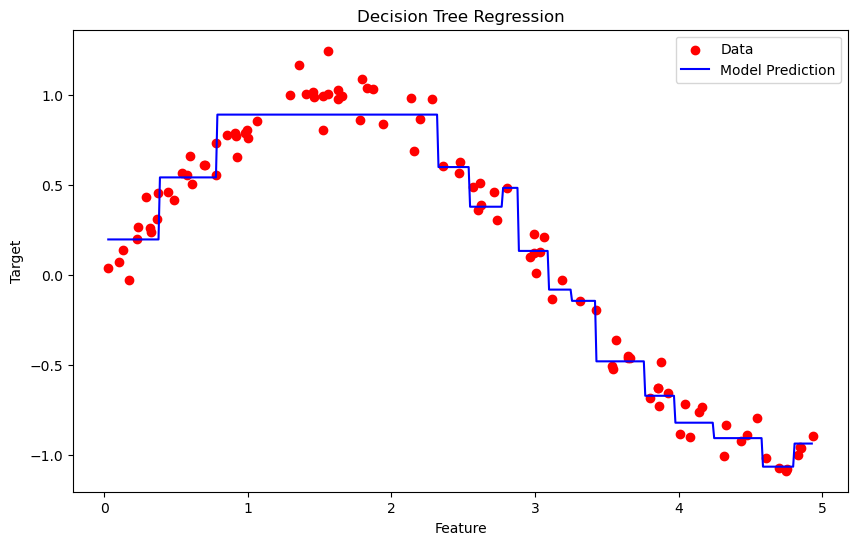

In [9]:
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
y_grid_pred = regressor.predict(X_grid)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Data')
plt.plot(X_grid, y_grid_pred, color='blue', label='Model Prediction')
plt.title("Decision Tree Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()